# CPSC 302: Assignment 1
## Nicholas Hu

### Exercise 1

#### (a)

From the Taylor expansions
\begin{align*}
    f(x_0 + h) &= f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + \frac{h^3}{6} f'''(x_0) + \mathcal{O}(h^4) \\
    f(x_0 - h) &= f(x_0) - h f'(x_0) + \frac{h^2}{2} f''(x_0) - \frac{h^3}{6} f'''(x_0) + \mathcal{O}(h^4)
\end{align*}
we have (for small $h$)
\begin{align*}
    f(x_0 + h) - f(x_0 - h) &\approx 2h f'(x_0) + \frac{h^3}{3} f'''(x_0) \\
    f'(x_0) - \frac{f(x_0 + h) - f(x_0 - h)}{2h} &\approx -\frac{h^2}{6} f'''(x_0).
\end{align*}

#### (b)

In [1]:
#= 
CPSC 302 Assignment 1
Nicholas Hu
=#

# Centred difference approximation for derivative of f(x) = sin(x) at x0 = 1.2

using PyPlot

f(x) = sin(x)
df(x) = cos(x)
max_f3 = 1  # The maximum absolute value of the third derivative of f (-cos(x))

x0 = 1.2

h = logspace(0, -20, 41)
abs_err = abs(df(x0) - (f(x0 + h) - f(x0 - h)) ./ (2h))

@printf("%10s %20s\n", "h", "Absolute error")
for i in 1:length(h)
    @printf("%10.2e %20e\n", h[i], abs_err[i])
end

         h       Absolute error
  1.00e+00         5.744422e-02
  3.16e-01         6.009171e-03
  1.00e-01         6.036277e-04
  3.16e-02         6.038994e-05
  1.00e-02         6.039266e-06
  3.16e-03         6.039293e-07
  1.00e-03         6.039301e-08
  3.16e-04         6.039307e-09
  1.00e-04         6.036187e-10
  3.16e-05         5.965517e-11
  1.00e-05         2.432887e-12
  3.16e-06         8.806122e-12
  1.00e-06         7.984058e-12
  3.16e-07         8.806122e-12
  1.00e-07         1.190064e-10
  3.16e-08         3.598895e-10
  1.00e-08         4.361052e-10
  3.16e-09         1.543886e-08
  1.00e-09         4.361052e-10
  3.16e-10         6.810136e-08
  1.00e-10         1.669696e-07
  3.16e-11         1.121351e-06
  1.00e-11         2.387416e-06
  3.16e-12         1.292198e-05
  1.00e-12         7.455191e-05
  3.16e-13         3.974052e-05
  1.00e-13         4.250484e-04
  3.16e-14         7.419072e-04
  1.00e-14         1.535271e-03
  3.16e-15         6.279760e-03
  1.00e-

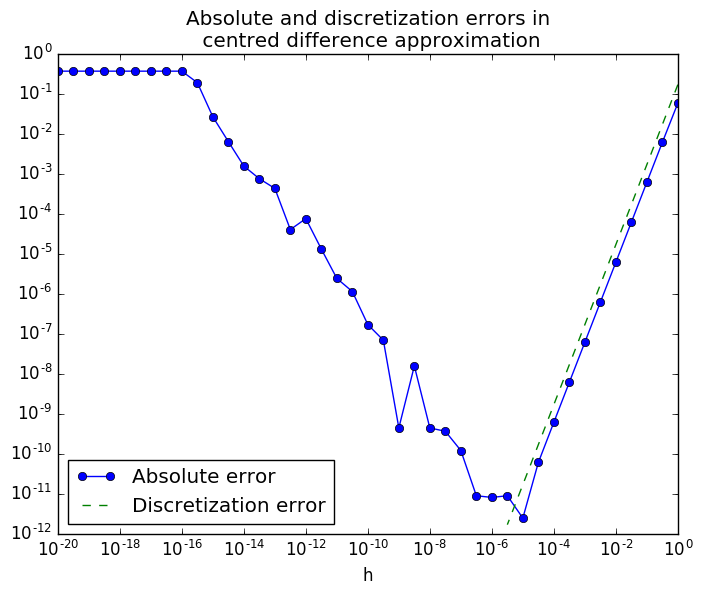

PyObject <matplotlib.text.Text object at 0x32900350>

In [2]:
p1 = loglog(h, abs_err, marker="o", label="Absolute error")
p2 = loglog(h[1:12], (h[1:12].^2 / 6) * max_f3, linestyle="--", 
            label="Discretization error")  # Truncated plot for aesthetics
xlabel("h")
legend(loc="lower left")
title("Absolute and discretization errors in\n centred difference approximation")

As the centred difference formula is second-order, we observe that (e.g.) a tenfold decrease in $h$ results in a hundredfold ($10^2$) decrease in the absolute error. However, for very small $h$ ($< 10^{-5}$), roundoff error begins to dominate as in the textbook example. For extremely small $h$ ($< 10^{-16}$), the numerator of the difference quotient is zero, so the absolute error is a constant $\left| \cos(x_0) - 0 \right| \approx 0.362358$.

### Exercise 2

#### (a)

Given
$$u_n = \int_0^1 \frac{x^n}{x + 0.5} \, dx,$$
we see that
\begin{align*}
u_n + 0.5u_{n-1} &= \int_0^1 \frac{x^n}{x + 0.5} \, dx + \int_0^1 \frac{0.5x^{n-1}}{x + 0.5} \, dx \\
&= \int_0^1 \frac{x^n + 0.5x^{n-1}}{x + 0.5} \, dx \\
&= \int_0^1 \frac{x^{n-1}(x + 0.5)}{x + 0.5} \, dx \\
&= \int_0^1 x^{n-1} \, dx = \frac{1}{n}.
\end{align*}
Hence $u_n = \frac{1}{n} - 0.5u_{n-1}$.

#### (b)

Firstly,
$$u_0 = \int_0^1 \frac{dx}{x + 0.5} = \left. \log(x + 0.5) \right\vert_0^1 = \log 3.$$

We can then compute $u_1$ using the formula above: $u_1 = \frac{1}{1} - 0.5 \log 3$. Similarly, $u_2 = \frac{1}{2} - 0.5u_1 = \frac{1}{2} - 0.5 \left( \frac{1}{1} - 0.5 \log 3 \right)$, and so forth for all $u_n$.

This algorithm is stable as any perturbations in the initial value $u_0$ are multiplied by a factor of 0.5 in each iteration. Therefore such perturbations would not affect the final value $u_{50}$ significantly. Hence the computed value of $u_{50}$ must be accurate for some initial value very close to $u_0$.

In [3]:
u0 = log(3)
u_prev = u0

@printf("%5s %20s %20s\n", "n", "u_n", "u_n - u_(n-1)")
@printf("%5d %20f\n", 0, u0)

for n in 1:50
    u = 1/n - 0.5u_prev
    @printf("%5d %20f %20f\n", n, u, u - u_prev)
    u_prev = u
end

    n                  u_n        u_n - u_(n-1)
    0             1.098612
    1             0.450694            -0.647918
    2             0.274653            -0.176041
    3             0.196007            -0.078646
    4             0.151997            -0.044010
    5             0.124002            -0.027995
    6             0.104666            -0.019336
    7             0.090524            -0.014142
    8             0.079738            -0.010786
    9             0.071242            -0.008496
   10             0.064379            -0.006863
   11             0.058720            -0.005659
   12             0.053974            -0.004746
   13             0.049936            -0.004037
   14             0.046460            -0.003476
   15             0.043436            -0.003024
   16             0.040782            -0.002655
   17             0.038433            -0.002349
   18             0.036339            -0.002093
   19             0.034462            -0.001877
   20        